In [1]:
# installing keras tuner
!pip install -q -U keras-tuner

In [2]:
# imports
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt

In [3]:
# loading the mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# checking the shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
# normalizing the pixel values in range of 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# checking the changes
X_train.min(), X_train.max()

(0.0, 1.0)

In [7]:
# defining the search space

def model_builder(hp):

  model = tf.keras.Sequential()

  # flatten layer
  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  
  # hidden layers
  for i in range(hp.Int('hidden_layers', min_value=2, max_value=4)):
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units' + str(i), min_value=40, max_value=80, step=10),
        activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid'])
    ))
  
  # output layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # compilation
  model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  # get the model
  return model

In [8]:
# creating a tuner object
tuner = kt.RandomSearch(hypermodel=model_builder, objective='val_accuracy', 
                        max_trials=4, directory='mydir', project_name='diabetes', seed=18)

In [9]:
# getting the hps summary
tuner.search_space_summary()

Search space summary
Default search space size: 14
hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
activation0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units3 (Int)
{'defau

In [10]:
# searching for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=0)

In [11]:
# checking the results 
tuner.results_summary(num_trials=1)

Results summary
Results in mydir/diabetes
Showing 1 best trials
Trial summary
Hyperparameters:
hidden_layers: 4
units0: 90
activation0: tanh
units1: 60
activation1: tanh
optimizer: adam
units2: 50
activation2: tanh
units3: 50
activation3: sigmoid
units4: 100
activation4: sigmoid
units5: 90
activation5: relu
Score: 0.9757999777793884


In [12]:
# fetching the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)

In [13]:
# getting the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 90)                70650     
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 50)                3050      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 82,220
Trainable params: 82,220
Non-traina

In [14]:
# model training with the best hyperparameters
history = model.fit(X_train, y_train, epochs=40, initial_epoch=6, validation_data=(X_test, y_test), verbose=0)

In [15]:
# checking the model performance
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Training: {}, Testing: {}'.format(round(train_accuracy * 100, 2), round(test_accuracy * 100, 2)))

Training: 99.8, Testing: 97.52


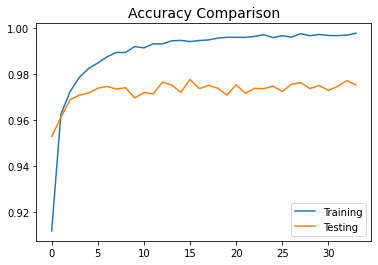

In [16]:
# plotting the accuracy
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('Accuracy Comparison', size=14)
plt.legend();

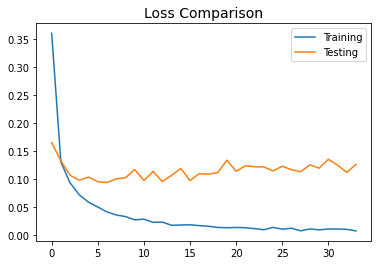

In [17]:
# plotting the loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Testing')
plt.title('Loss Comparison', size=14)
plt.legend();